In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(style='ticks', context='paper', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

import flotilla

flotilla_dir = '/projects/ps-yeolab/obotvinnik/flotilla_projects'

study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', flotilla_dir=flotilla_dir)

not_outliers = study.splicing.singles.index.difference(study.splicing.outliers.index)


/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:65: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-07-20 12:53:19	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-07-20 12:53:19	Parsing datapackage to create a Study object
2016-07-20 12:54:08 	Initializing Study
2016-07-20 12:54:08 	Initializing Predictor configuration manager for Study
2016-07-20 12:54:08	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-07-20 12:54:08	Added ExtraTreesClassifier to default predictors
2016-07-20 12:54:08	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-07-20 12:54:08	Added ExtraTreesRegressor to default predictors
2016-07-20 12:54:08	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-07-20 12:54:08	Added GradientBoostingClassifier to default predictors
2016-07-20 12:54:08	Predictor GradientBoostingRegressor is of type <class 'sklear

In [3]:
modalities_splice_types = study.supplemental.modalities_tidy.join(study.splicing.feature_data['splice_type'], on='event_id')
modalities_splice_types.head()

,phenotype,event_id,modality,splice_type
0,MN,exon:chr10:101165513-101165617:-@exon:chr10:10...,included,SE
1,MN,exon:chr10:101480744-101480825:-@exon:chr10:10...,bimodal,SE
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,SE
3,MN,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,SE
4,MN,exon:chr10:102747070-102747240:-@exon:chr10:10...,bimodal,SE


In [27]:
modalities_splice_types_count = modalities_splice_types.groupby(['modality', 'splice_type']).size().unstack()
modalities_splice_types_count

splice_type,MXE,SE
modality,,
bimodal,342,6737
excluded,643,4557
included,532,13165
middle,NaN,1
uncategorized,1,39


In [28]:
s = study.splicing.feature_data.loc[study.splicing.data.columns, 'splice_type']
all_events = s.groupby(s).size()
all_events.name = 'all'
all_events.head()

splice_type
MXE     1345
SE     15015
Name: all, dtype: int64

In [29]:
modalities_splice_types_count = modalities_splice_types_count.append(all_events)
modalities_splice_types_count

splice_type,MXE,SE
modality,,
bimodal,342,6737
excluded,643,4557
included,532,13165
middle,NaN,1
uncategorized,1,39
all,1345,15015


In [30]:
tidy = modalities_splice_types_count.unstack().reset_index()
tidy = tidy.rename(columns={0: 'n_events'})
tidy

,splice_type,modality,n_events
0,MXE,bimodal,342
1,MXE,excluded,643
2,MXE,included,532
3,MXE,middle,NaN
4,MXE,uncategorized,1
5,MXE,all,1345
6,SE,bimodal,6737
7,SE,excluded,4557
8,SE,included,13165
9,SE,middle,1


In [31]:
tidy['percentage_of_modality'] = tidy.groupby('modality')['n_events'].apply(lambda x: 100 * x/x.sum())
tidy

,splice_type,modality,n_events,percentage_of_modality
0,MXE,bimodal,342,4.831191
1,MXE,excluded,643,12.365385
2,MXE,included,532,3.884062
3,MXE,middle,NaN,NaN
4,MXE,uncategorized,1,2.500000
5,MXE,all,1345,8.221271
6,SE,bimodal,6737,95.168809
7,SE,excluded,4557,87.634615
8,SE,included,13165,96.115938
9,SE,middle,1,100.000000


In [32]:
folder = 'figures'

In [33]:
sns.set(context='paper', style='ticks')

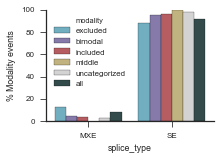

In [34]:

import anchor

hue_order = anchor.MODALITY_ORDER + ['all']
palette = anchor.MODALITY_PALETTE + ['DarkSlateGray']

fig, ax = plt.subplots(figsize=(3, 2))
sns.barplot(x='splice_type', y='percentage_of_modality', hue='modality', data=tidy, 
            hue_order=hue_order, palette=palette)
ax.set(ylabel='% Modality events')
sns.despine()
fig.savefig('{}/percent_modality_in_splice_types.pdf'.format(folder))